In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn import cross_validation
from sklearn.utils import shuffle

/Users/hknam/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
housing_data = datasets.load_boston()

In [3]:
X, y = shuffle(housing_data.data, housing_data.target, random_state = 7)

In [4]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2, random_state = 7)

In [5]:
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4), n_estimators = 400, random_state = 7)

In [6]:
regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [7]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

In [8]:
print('Adaboost regressor')
print('Mean squared error = ', round(mse, 2))
print('Explained variance score = ', round(evs, 2))

Adaboost regressor
Mean squared error =  22.3
Explained variance score =  0.8


In [9]:
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names

In [10]:
feature_importances = 100 * (feature_importances / max(feature_importances))

In [11]:
index_sorted = np.flipud(np.argsort(feature_importances))

In [12]:
pos = np.arange(index_sorted.shape[0]) + 0.5

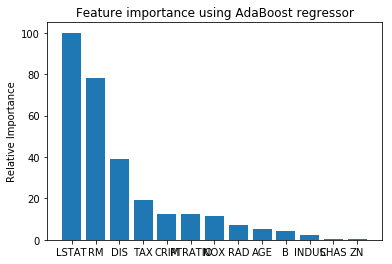

In [13]:
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align = 'center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()